In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/flight_delays.csv', sep=',')
data

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


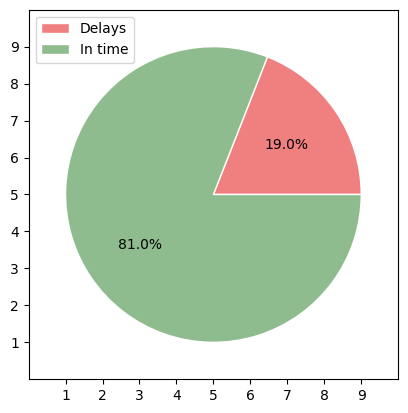

In [48]:
# доля всех задержек ко всем вылетам

delays = data[(data['dep_delayed_15min'] == 'Y')]['dep_delayed_15min'].count()
intime = data[(data['dep_delayed_15min'] == 'N')]['dep_delayed_15min'].count()

x = [delays, intime]
colors = ('lightcoral', 'darkseagreen')

fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=4, center=(5, 5),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True, autopct='%.1f%%')

ax.set(xlim=(0, 10), xticks=np.arange(1, 10),
       ylim=(0, 10), yticks=np.arange(1, 10))
ax.legend(['Delays', 'In time'])

plt.show()

count    100000.00000
mean        729.39716
std         574.61686
min          30.00000
25%         317.00000
50%         575.00000
75%         957.00000
max        4962.00000
Name: Distance, dtype: float64


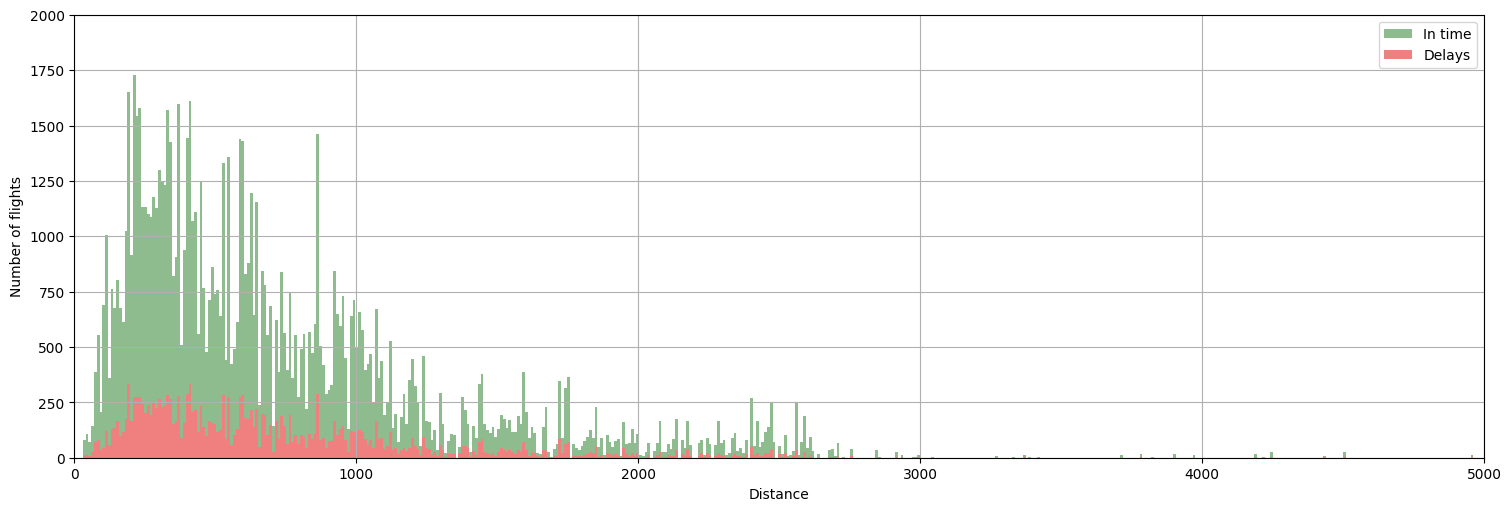

In [49]:
#зависимость количества задержек от длины пути, который предстоит пролететь самолёту

distances = data['Distance']
print(distances.describe())
#выяснили, что дистанции в базе данных не больше 5000

delays = data[data['dep_delayed_15min'] == 'Y']['Distance']

#берутся дистанции в диапазоне 10 (например 100-110), и подсчитывается количество таких дистанций
fig, ax = plt.subplots(figsize=(15, 5), layout='constrained')
n, bins, patches = ax.hist(distances, 500, facecolor='darkseagreen', alpha=1)
n, bins, patches = ax.hist(delays, 500, facecolor='lightcoral', alpha=1)

ax.set_xlabel('Distance')
ax.set_ylabel('Number of flights')
ax.axis([0, 5000, 0, 2000])
ax.legend(['In time', 'Delays'])
ax.grid(True)

In [50]:
#топ 5 направлений, для которых чаще всего происходят задержки

dests = data['Dest'].unique()
print(dests, 'Количество:', len(dests))
#всего 289 направлений

#количество рейсов по пунктам назначения
destfl = np.zeros(289)
#количество задержек по пунктам назначения
destdel = np.zeros(289)
#доля задержек по пунктам назначения
destfreq = np.zeros(289)

#заполняем массивы
for i in range(289):
    destfl[i] = data[(data['Dest'] == dests[i])]['dep_delayed_15min'].count()
    destdel[i] = data[(data['dep_delayed_15min'] == 'Y') & (data['Dest'] == dests[i])]['dep_delayed_15min'].count()
    destfreq[i] = destdel[i]/destfl[i]

#сортировка пунктов назначения по убыванию процента задержек
for i in range(289):
    for j in range(i, 289):
        if destfreq[j] > destfreq[i]:
          aaa = destfreq[i]
          destfreq[i] = destfreq[j]
          destfreq[j] = aaa
          bbb = dests[i]
          dests[i] = dests[j]
          dests[j] = bbb

#пункты назначения по убыванию процента задержек
for i in range(289):
    print(dests[i], ':', 100*destfreq[i])

['DFW' 'MCO' 'CLE' 'MEM' 'OMA' 'LGA' 'CVG' 'PSC' 'STL' 'SEA' 'SJC' 'ORD'
 'IAH' 'ATL' 'CMH' 'ILM' 'MSP' 'PHX' 'AUS' 'SYR' 'LAX' 'HNL' 'ORF' 'MYR'
 'PDX' 'CHS' 'SMF' 'DTW' 'SNA' 'PHL' 'IAD' 'LAS' 'OGG' 'ABI' 'SLC' 'EWR'
 'PVD' 'SFO' 'RDU' 'MDW' 'DAL' 'SAT' 'RNO' 'JAX' 'HRL' 'JAN' 'ISP' 'TPA'
 'JFK' 'FCA' 'PIT' 'CLT' 'BUF' 'OKC' 'ANC' 'SAN' 'BET' 'FLL' 'SBA' 'GJT'
 'DEN' 'MIA' 'BZN' 'FWA' 'BDL' 'BOI' 'GSO' 'GSP' 'OAK' 'LAN' 'YUM' 'MKE'
 'MQT' 'ONT' 'ELP' 'LBB' 'PBI' 'SJU' 'ACY' 'CAK' 'ABQ' 'KOA' 'BNA' 'IDA'
 'EVV' 'LEX' 'ITO' 'SBP' 'BOS' 'KTN' 'SGF' 'HOU' 'ALB' 'TUL' 'ABE' 'AMA'
 'LIT' 'IND' 'ROA' 'ROC' 'SAV' 'TOL' 'FAT' 'MCI' 'MSN' 'DCA' 'GRR' 'BUR'
 'AVL' 'MLU' 'ACV' 'RIC' 'COS' 'DAY' 'GRB' 'CRP' 'FNT' 'ICT' 'TLH' 'XNA'
 'CRW' 'GEG' 'HPN' 'VPS' 'CMI' 'LNK' 'EYW' 'BWI' 'MAF' 'HSV' 'TUS' 'PSP'
 'SHV' 'MSY' 'LIH' 'FAR' 'EUG' 'SDF' 'MHT' 'DSM' 'FLO' 'ISO' 'MFE' 'RDD'
 'BHM' 'BMI' 'FSD' 'RSW' 'FAY' 'CAE' 'MTJ' 'LWB' 'CLD' 'RAP' 'PWM' 'GPT'
 'TYS' 'SRQ' 'MBS' 'AVP' 'AZO' 'CEC' 'MFR' 'DAB' 'T

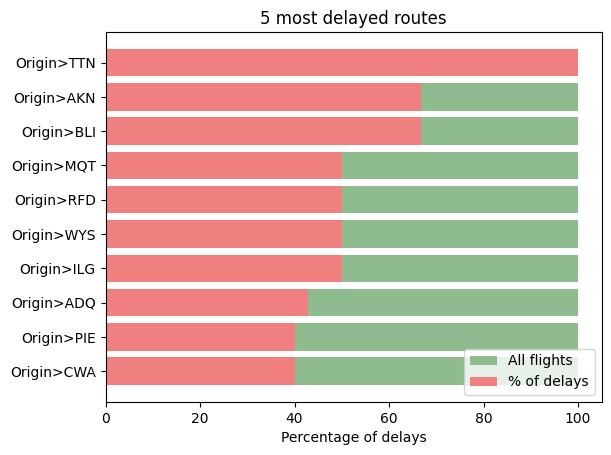

In [51]:
#на графике 10 направлений, так как некоторые направления имеют одинаковую статистику

plt.rcdefaults()
fig, ax = plt.subplots()

carriers = ('Origin>TTN', 'Origin>AKN', 'Origin>BLI', 'Origin>MQT', 'Origin>RFD', 'Origin>WYS', 'Origin>ILG', 'Origin>ADQ', 'Origin>PIE', 'Origin>CWA')
y_pos = np.arange(len(carriers))
flightsfreq = np.full(10, 100)
delfrequ = [100, 66.66666666666666, 66.66666666666666, 50, 50, 50, 50, 42.857142857142854, 40, 40,] 

ax.barh(y_pos, flightsfreq, align='center', color = 'darkseagreen')
ax.barh(y_pos, delfrequ, align='center', color = 'lightcoral')
ax.set_yticks(y_pos, labels=carriers)
ax.invert_yaxis()
ax.set_xlabel('Percentage of delays')
ax.set_title('5 most delayed routes')
ax.legend(['All flights', '% of delays'])

plt.show()

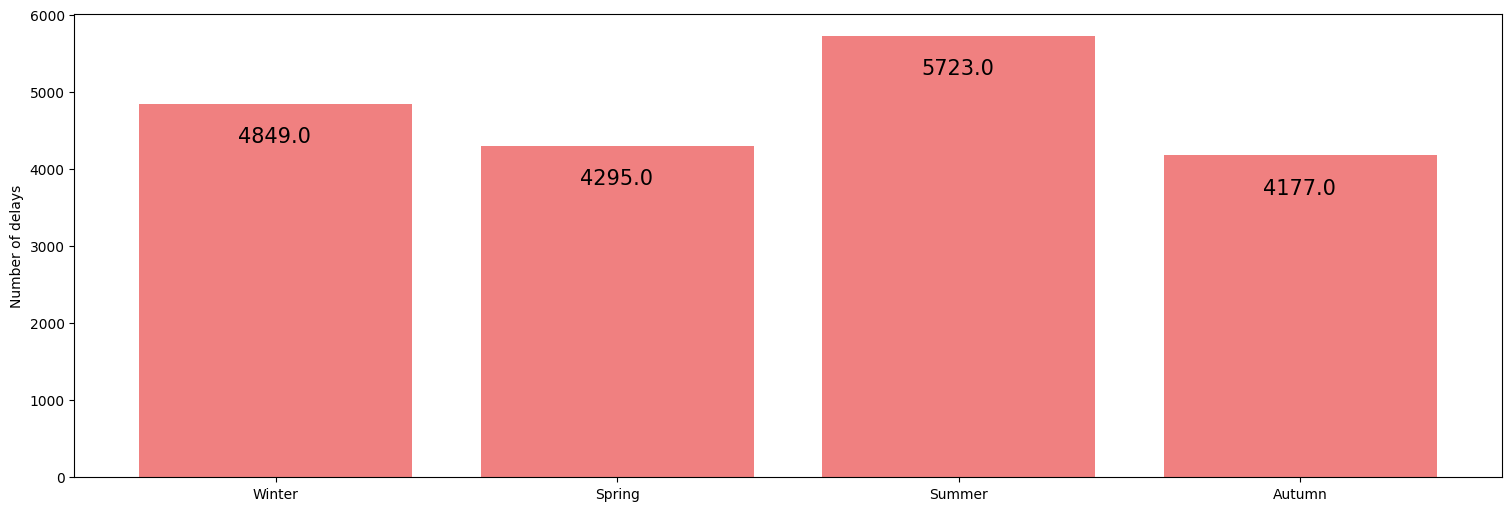

In [52]:
#в какие времена года чаще всего происходят задержки рейсов

mondel = np.zeros(12)
seasondel = np.zeros(4)

mondel[0] = data[(data['dep_delayed_15min'] == 'Y') & (data['Month'] == 'c-1')]['Month'].count()
mondel[1] = data[(data['dep_delayed_15min'] == 'Y') & (data['Month'] == 'c-2')]['Month'].count()
mondel[2] = data[(data['dep_delayed_15min'] == 'Y') & (data['Month'] == 'c-3')]['Month'].count()
mondel[3] = data[(data['dep_delayed_15min'] == 'Y') & (data['Month'] == 'c-4')]['Month'].count()
mondel[4] = data[(data['dep_delayed_15min'] == 'Y') & (data['Month'] == 'c-5')]['Month'].count()
mondel[5] = data[(data['dep_delayed_15min'] == 'Y') & (data['Month'] == 'c-6')]['Month'].count()
mondel[6] = data[(data['dep_delayed_15min'] == 'Y') & (data['Month'] == 'c-7')]['Month'].count()
mondel[7] = data[(data['dep_delayed_15min'] == 'Y') & (data['Month'] == 'c-8')]['Month'].count()
mondel[8] = data[(data['dep_delayed_15min'] == 'Y') & (data['Month'] == 'c-9')]['Month'].count()
mondel[9] = data[(data['dep_delayed_15min'] == 'Y') & (data['Month'] == 'c-10')]['Month'].count()
mondel[10] = data[(data['dep_delayed_15min'] == 'Y') & (data['Month'] == 'c-11')]['Month'].count()
mondel[11] = data[(data['dep_delayed_15min'] == 'Y') & (data['Month'] == 'c-12')]['Month'].count()

#зима
seasondel[0] = mondel[11] + mondel[0] + mondel[1]
#весна
seasondel[1] = mondel[2] + mondel[3] + mondel[4]
#лето
seasondel[2] = mondel[5] + mondel[6] + mondel[7]
#осень
seasondel[3] = mondel[8] + mondel[9] + mondel[10]

fig, ax = plt.subplots(figsize=(15, 5), layout='constrained')

seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
counts = [seasondel[0], seasondel[1], seasondel[2], seasondel[3]]
bar_colors = 'lightcoral'

pl = ax.bar(seasons, counts, color=bar_colors)
ax.set_ylabel('Number of delays')

for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.29, bar.get_height()-500), 
                     fontsize=15)

plt.show()

#чаще всего задержки рейсов происходят летом

In [53]:
#топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы
#будем сравнивать по проценту задержек среди всех рейсов перевозчика

print(data['UniqueCarrier'].nunique())
print(data['UniqueCarrier'].unique())
#всего в базе данных 22 перевозчика

#количество рейсов у каждого перевозчика
carflights = np.zeros(22)

#количество задержек у каждого перевозчика
cardel = np.zeros(22)

#процент задержек у каждого перевозчика
delfreq = np.zeros(22)

cardel[0] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'AA')]['dep_delayed_15min'].count()
cardel[1] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'US')]['dep_delayed_15min'].count()
cardel[2] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'XE')]['dep_delayed_15min'].count()
cardel[3] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'OO')]['dep_delayed_15min'].count()
cardel[4] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'WN')]['dep_delayed_15min'].count()
cardel[5] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'NW')]['dep_delayed_15min'].count()
cardel[6] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'DL')]['dep_delayed_15min'].count()
cardel[7] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'OH')]['dep_delayed_15min'].count()
cardel[8] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'AS')]['dep_delayed_15min'].count()
cardel[9] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'UA')]['dep_delayed_15min'].count()
cardel[10] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'MQ')]['dep_delayed_15min'].count()
cardel[11] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'CO')]['dep_delayed_15min'].count()
cardel[12] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'EV')]['dep_delayed_15min'].count()
cardel[13] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'DH')]['dep_delayed_15min'].count()
cardel[14] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'YV')]['dep_delayed_15min'].count()
cardel[15] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'F9')]['dep_delayed_15min'].count()
cardel[16] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'AQ')]['dep_delayed_15min'].count()
cardel[17] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'TZ')]['dep_delayed_15min'].count()
cardel[18] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'HP')]['dep_delayed_15min'].count()
cardel[19] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'B6')]['dep_delayed_15min'].count()
cardel[20] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'FL')]['dep_delayed_15min'].count()
cardel[21] = data[(data['dep_delayed_15min'] == 'Y') & (data['UniqueCarrier'] == 'HA')]['dep_delayed_15min'].count()

carflights[0] = data[data['UniqueCarrier'] == 'AA']['UniqueCarrier'].count()
carflights[1] = data[data['UniqueCarrier'] == 'US']['UniqueCarrier'].count()
carflights[2] = data[data['UniqueCarrier'] == 'XE']['UniqueCarrier'].count()
carflights[3] = data[data['UniqueCarrier'] == 'OO']['UniqueCarrier'].count()
carflights[4] = data[data['UniqueCarrier'] == 'WN']['UniqueCarrier'].count()
carflights[5] = data[data['UniqueCarrier'] == 'NW']['UniqueCarrier'].count()
carflights[6] = data[data['UniqueCarrier'] == 'DL']['UniqueCarrier'].count()
carflights[7] = data[data['UniqueCarrier'] == 'OH']['UniqueCarrier'].count()
carflights[8] = data[data['UniqueCarrier'] == 'AS']['UniqueCarrier'].count()
carflights[9] = data[data['UniqueCarrier'] == 'UA']['UniqueCarrier'].count()
carflights[10] = data[data['UniqueCarrier'] == 'MQ']['UniqueCarrier'].count()
carflights[11] = data[data['UniqueCarrier'] == 'CO']['UniqueCarrier'].count()
carflights[12] = data[data['UniqueCarrier'] == 'EV']['UniqueCarrier'].count()
carflights[13] = data[data['UniqueCarrier'] == 'DH']['UniqueCarrier'].count()
carflights[14] = data[data['UniqueCarrier'] == 'YV']['UniqueCarrier'].count()
carflights[15] = data[data['UniqueCarrier'] == 'F9']['UniqueCarrier'].count()
carflights[16] = data[data['UniqueCarrier'] == 'AQ']['UniqueCarrier'].count()
carflights[17] = data[data['UniqueCarrier'] == 'TZ']['UniqueCarrier'].count()
carflights[18] = data[data['UniqueCarrier'] == 'HP']['UniqueCarrier'].count()
carflights[19] = data[data['UniqueCarrier'] == 'B6']['UniqueCarrier'].count()
carflights[20] = data[data['UniqueCarrier'] == 'FL']['UniqueCarrier'].count()
carflights[21] = data[data['UniqueCarrier'] == 'HA']['UniqueCarrier'].count()

for i in range(22):
    delfreq[i] = cardel[i]/carflights[i]
delfreq *= 100

for i in range(22):
    print(i, ':', data['UniqueCarrier'].unique()[i], ':', delfreq[i])

22
['AA' 'US' 'XE' 'OO' 'WN' 'NW' 'DL' 'OH' 'AS' 'UA' 'MQ' 'CO' 'EV' 'DH'
 'YV' 'F9' 'AQ' 'TZ' 'HP' 'B6' 'FL' 'HA']
0 : AA : 18.793799108090887
1 : US : 16.738660907127432
2 : XE : 17.386883579054395
3 : OO : 17.280108254397835
4 : WN : 21.34332316668877
5 : NW : 16.78900515383414
6 : DL : 16.89222440944882
7 : OH : 17.58815846756639
8 : AS : 24.34743474347435
9 : UA : 19.226294357184408
10 : MQ : 19.454521026467823
11 : CO : 18.181818181818183
12 : EV : 27.531806615776084
13 : DH : 16.149068322981368
14 : YV : 22.462406015037594
15 : F9 : 15.50695825049702
16 : AQ : 7.6923076923076925
17 : TZ : 14.349775784753364
18 : HP : 14.223512336719885
19 : B6 : 21.381936887921654
20 : FL : 24.21849292530438
21 : HA : 4.330708661417323


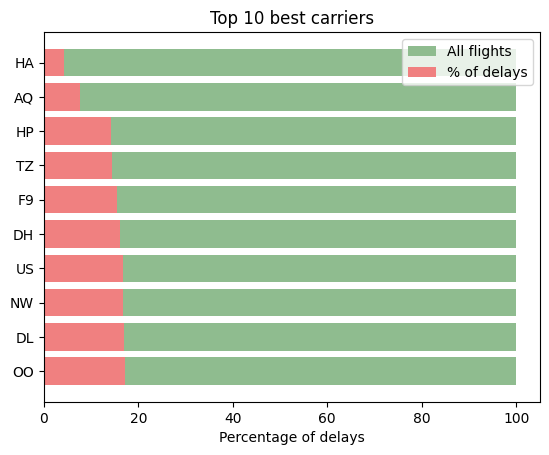

In [54]:
plt.rcdefaults()
fig, ax = plt.subplots()

carriers = ('HA', 'AQ', 'HP', 'TZ', 'F9', 'DH', 'US', 'NW', 'DL', 'OO')
y_pos = np.arange(len(carriers))
flightsfreq = np.full(10, 100)
delfrequ = [delfreq[21], delfreq[16], delfreq[18], delfreq[17], delfreq[15], delfreq[13], delfreq[1], delfreq[5], delfreq[6], delfreq[3]] 

ax.barh(y_pos, flightsfreq, align='center', color = 'darkseagreen')
ax.barh(y_pos, delfrequ, align='center', color = 'lightcoral')
ax.set_yticks(y_pos, labels=carriers)
ax.invert_yaxis()
ax.set_xlabel('Percentage of delays')
ax.set_title('Top 10 best carriers')
ax.legend(['All flights', '% of delays'])

plt.show()

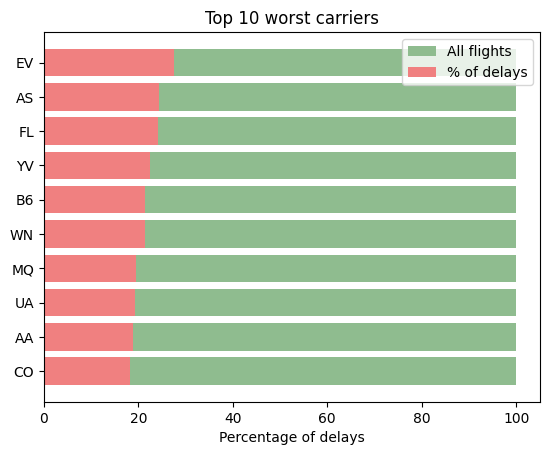

In [55]:
#топ 10 самых безответственных аэропортов, в которых чаще всего происходят задержки
#будем сравнивать по проценту задержек среди всех рейсов перевозчика

plt.rcdefaults()
fig, ax = plt.subplots()

carriers = ('EV', 'AS', 'FL', 'YV', 'B6', 'WN', 'MQ', 'UA', 'AA', 'CO')
y_pos = np.arange(len(carriers))
flightsfreq = np.full(10, 100)
delfrequ = [delfreq[12], delfreq[8], delfreq[20], delfreq[14], delfreq[19], delfreq[4], delfreq[10], delfreq[9], delfreq[0], delfreq[11]]

ax.barh(y_pos, flightsfreq, align='center', color = 'darkseagreen')
ax.barh(y_pos, delfrequ, align='center', color = 'lightcoral')
ax.set_yticks(y_pos, labels=carriers)
ax.invert_yaxis()
ax.set_xlabel('Percentage of delays')
ax.set_title('Top 10 worst carriers')
ax.legend(['All flights', '% of delays'])

plt.show()

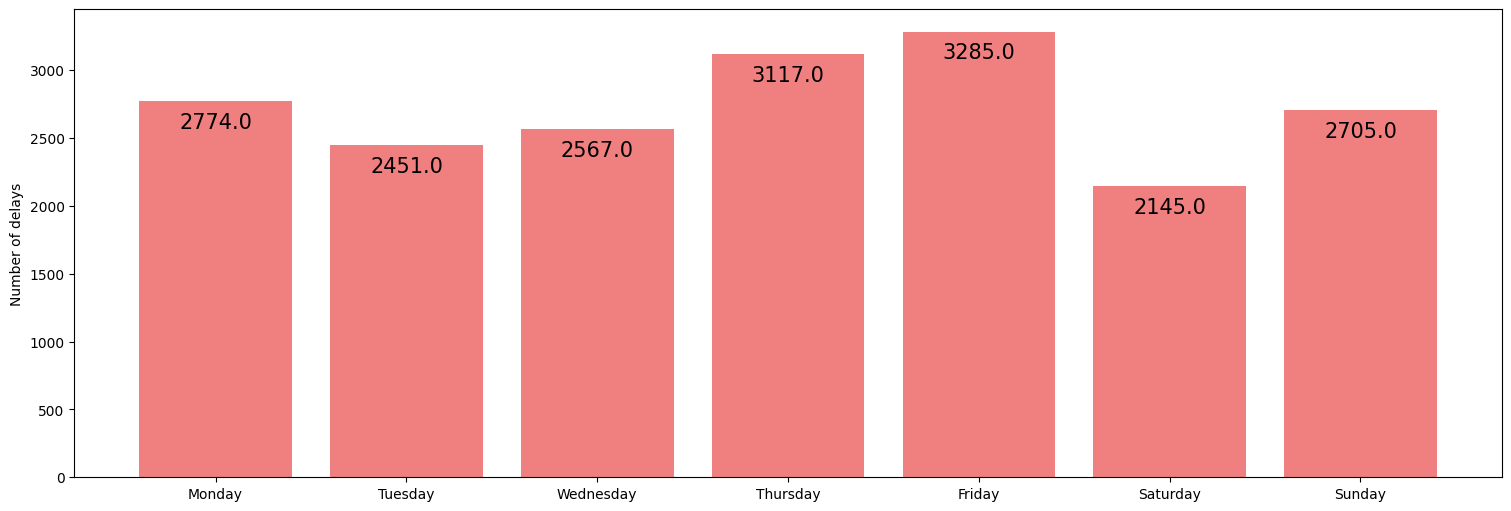

In [56]:
#необычную зависимость количества задержек от имеющихся данных
#найдём несложную зависимость количества задержек от дня недели

week = np.zeros(7)

week[0] = data[(data['dep_delayed_15min'] == 'Y') & (data['DayOfWeek'] == 'c-1')]['DayOfWeek'].count()
week[1] = data[(data['dep_delayed_15min'] == 'Y') & (data['DayOfWeek'] == 'c-2')]['DayOfWeek'].count()
week[2] = data[(data['dep_delayed_15min'] == 'Y') & (data['DayOfWeek'] == 'c-3')]['DayOfWeek'].count()
week[3] = data[(data['dep_delayed_15min'] == 'Y') & (data['DayOfWeek'] == 'c-4')]['DayOfWeek'].count()
week[4] = data[(data['dep_delayed_15min'] == 'Y') & (data['DayOfWeek'] == 'c-5')]['DayOfWeek'].count()
week[5] = data[(data['dep_delayed_15min'] == 'Y') & (data['DayOfWeek'] == 'c-6')]['DayOfWeek'].count()
week[6] = data[(data['dep_delayed_15min'] == 'Y') & (data['DayOfWeek'] == 'c-7')]['DayOfWeek'].count()


fig, ax = plt.subplots(figsize=(15, 5), layout='constrained')

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
counts = [week[0], week[1], week[2], week[3], week[4], week[5], week[6]]
bar_colors = 'lightcoral'

pl = ax.bar(days, counts, color=bar_colors)
ax.set_ylabel('Number of delays')

for bar in pl:
    plt.annotate(bar.get_height(), 
                 xy=(bar.get_x()+0.21, bar.get_height()-200), 
                     fontsize=15)

plt.show()